# AB Steindl simulations tutorial and demo #

A short tutorial demonstrating how to run AB Steindl simulations and demonstrating the range of output produced.

First, load the module.

In [1]:
from absteindl import Steindl

## Simulation 1: 10 firms, baseline model, deterministic ##

Set up the model. We'll start with a small number of firms using a simplified 'baseline' model which abstracts from expectation errors, bankruptcies and liquidity issues.

We enable this simplified model using the flag `baseline_model`. We also want to collect time series data for each firm which is enabled using the `firms_data` flag.

We'll set &zeta;=1 to make the model fully deterministic

In [2]:
# create the simulation model
sim1 = Steindl(num_firms = 10, num_periods = 500)

sim1.flags.baseline_model = True
sim1.flags.firm_results = True

# set the model parameters
sim1.set_params(
    alpha1  = 0.7,  # consumption out of income
    alpha2  = 0.1,  # consumption out of wealth
    gamma0  = 0.02, # trend growth
    gamma_m = 0.05,  # profit margin sensitivity
    gamma_u = 0.05, # utilisation rate sensitivity
    iota    = 0.2,  # desired inventory to output ratio
    theta   = 0.5,  # desired liquidity ratio
    v       = 4,    # capital full output ratio
    llambda = 1, # profit retention ratio (lambda reserved)
    r_L_bar = 0.03, # interest rate
    tau_bar = 0.25, # mark-up
    kappa   = 3,   # degree of mark-up adjustment to market share
    pr      = 1,    # labour productivity
    zeta    = 1    # size to revenue feedback 
)

# set the required initial variables
sim1.set_ivars(
    Y    = 34,
    Y_h  = 27,
    K    = 100,
    I    = 10,
    IV   = 5,
    F_n  = 2.8,
    F_r  = 2.1,
    r    = 0.06,
    u    = 1.46,
    D_h  = 100,
    D_f  = 0,
    L    = 80,
)

# initialise the model (creates firms with stochastic variation etc.)
sim1.initialise()

INFO:root:initialising model with 500 periods 10 firms


Run the model

In [3]:
sim1.run()

INFO:root:starting simulation for 500 periods with 10 firms
INFO:root:simulation complete
INFO:root:results compiled


And generate plots

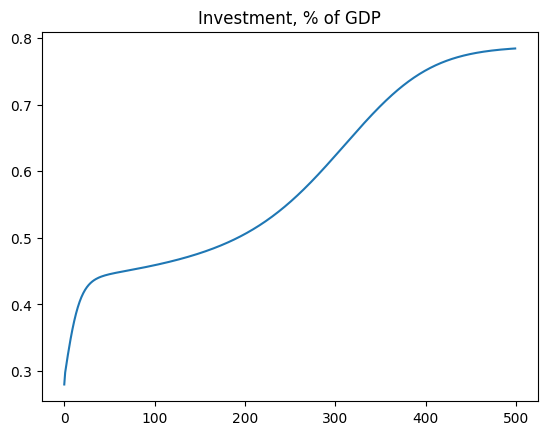

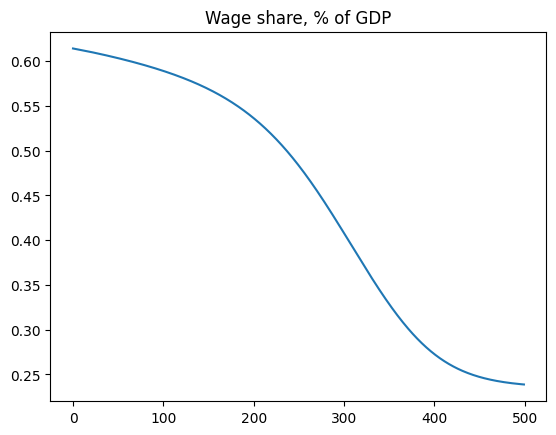

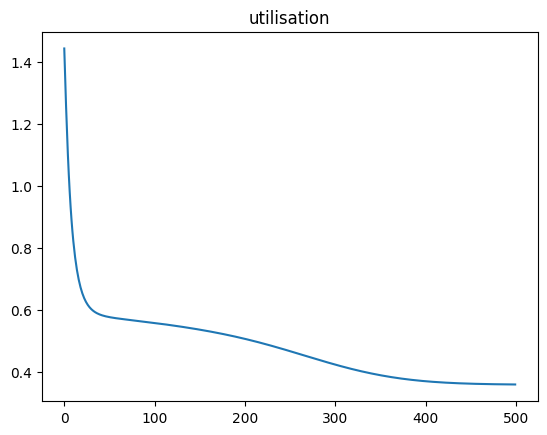

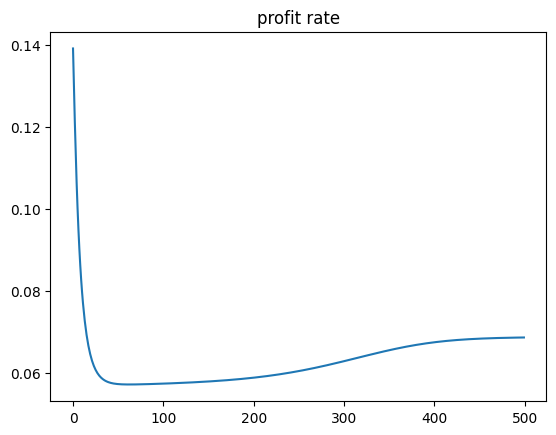

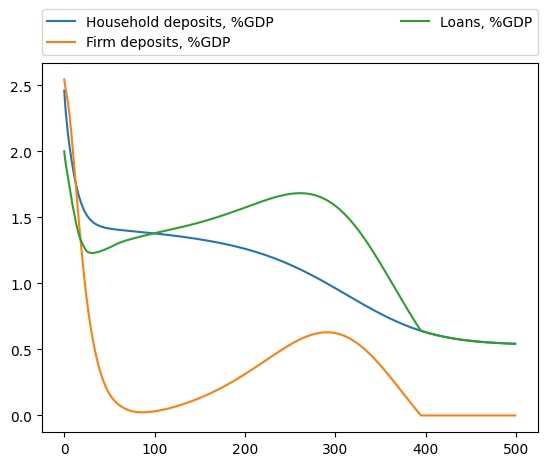

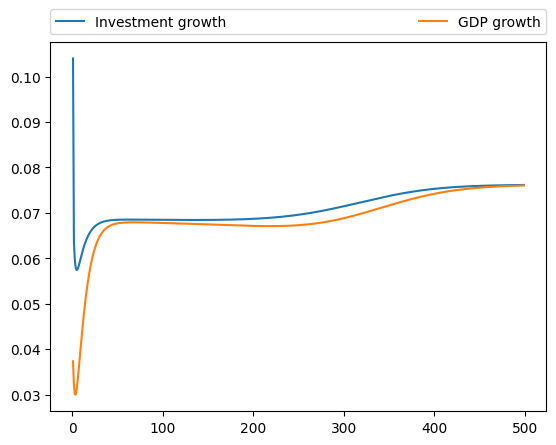

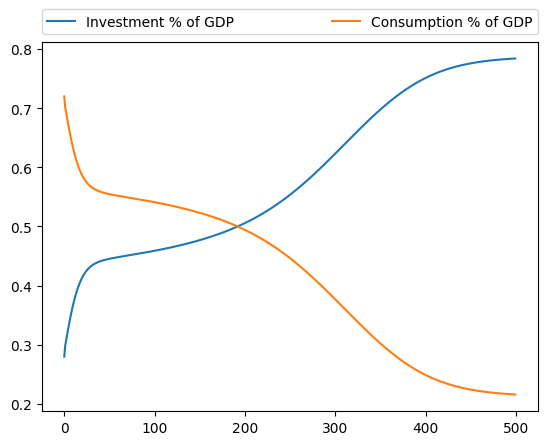

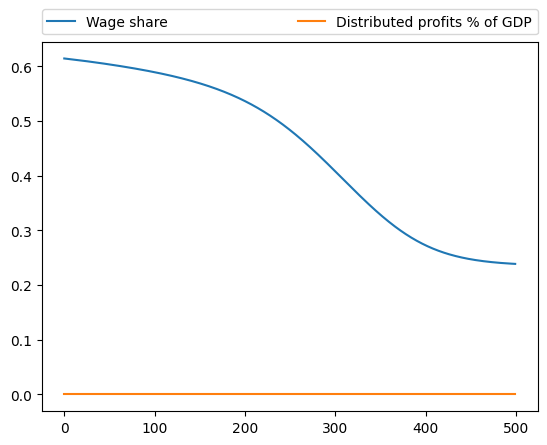

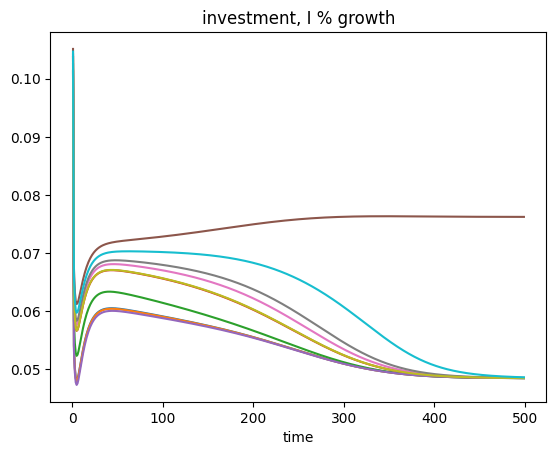

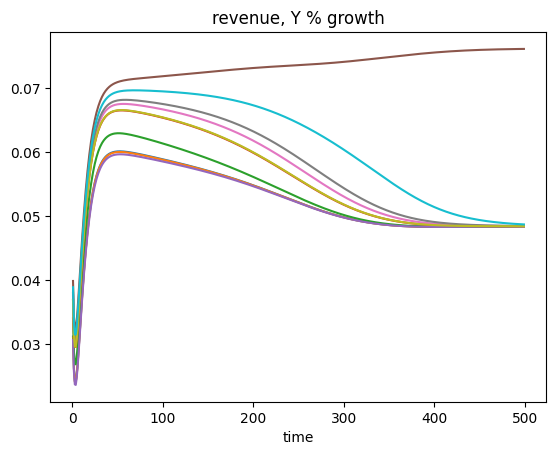

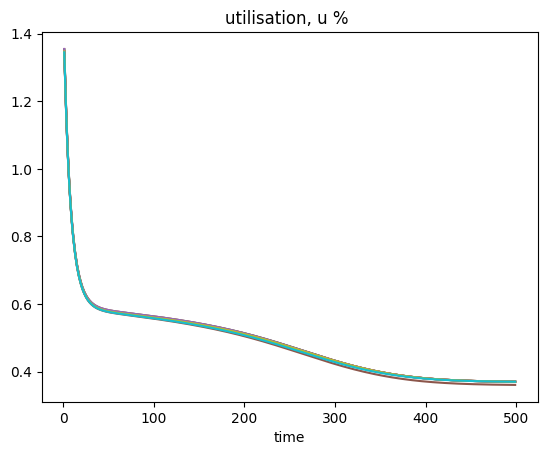

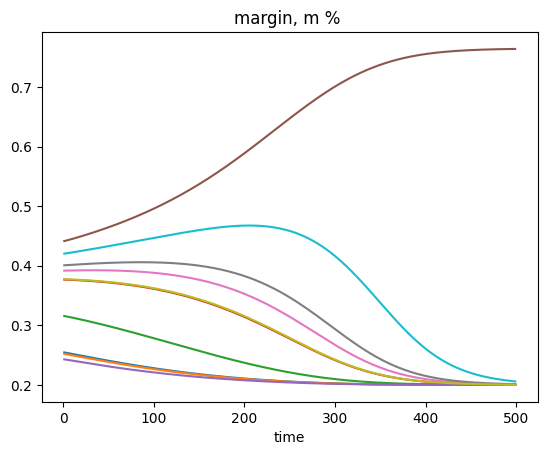

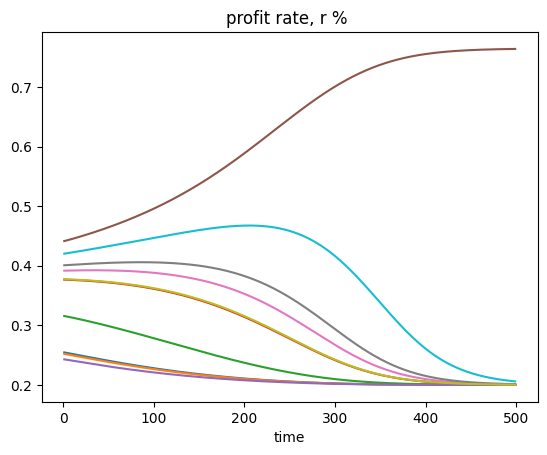

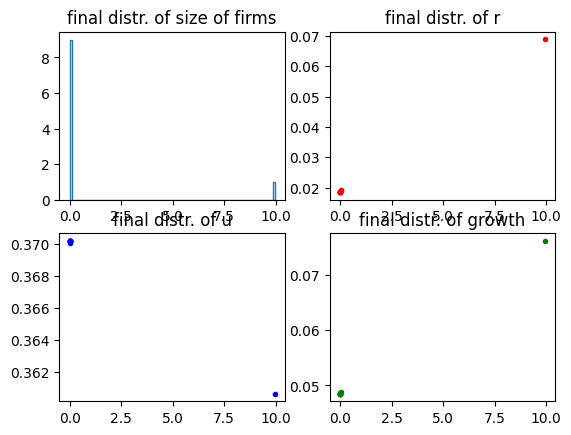

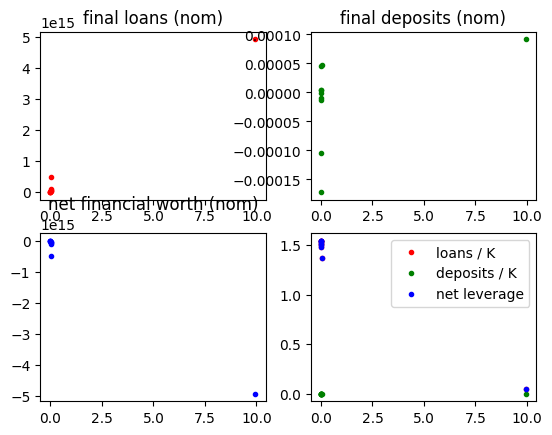

In [4]:
sim1.plot()

If the paramaterisation isn't quite right, the initial periods can be relatively unstable until the model settles down. We can truncate these from the plots

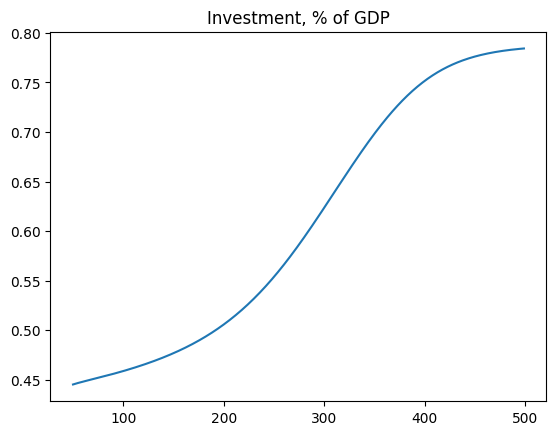

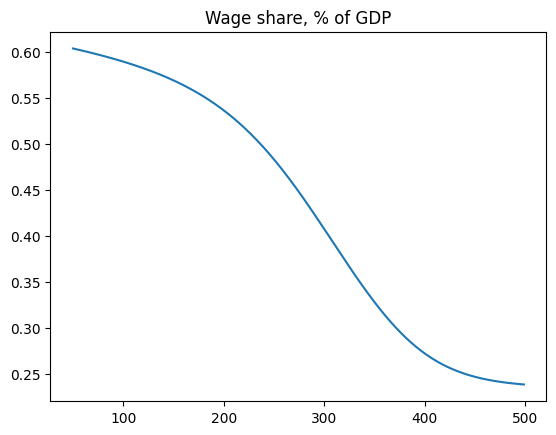

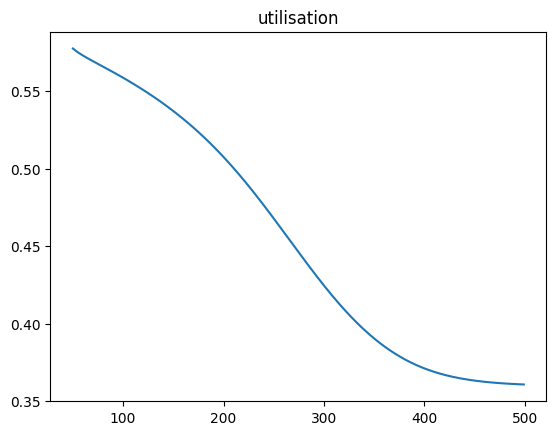

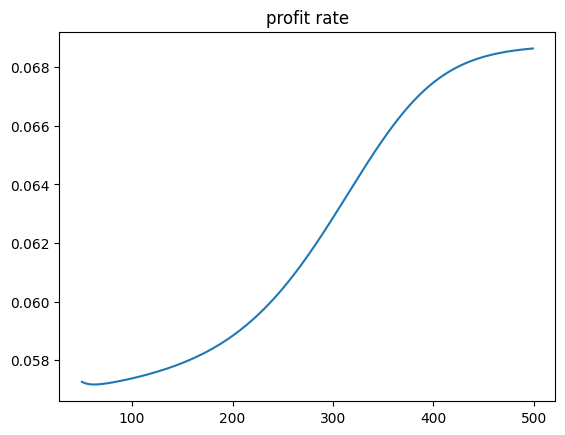

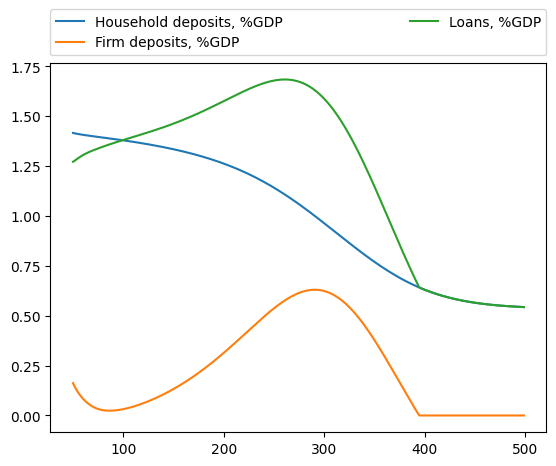

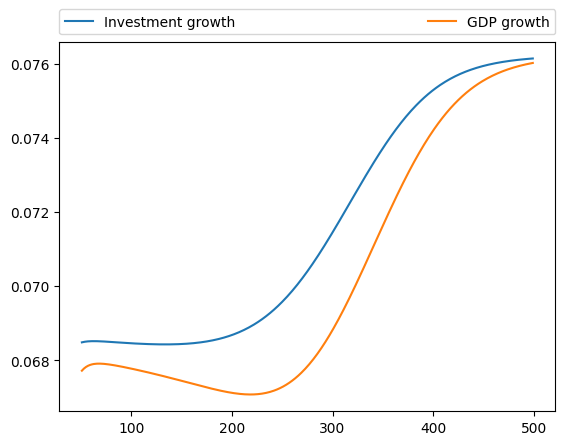

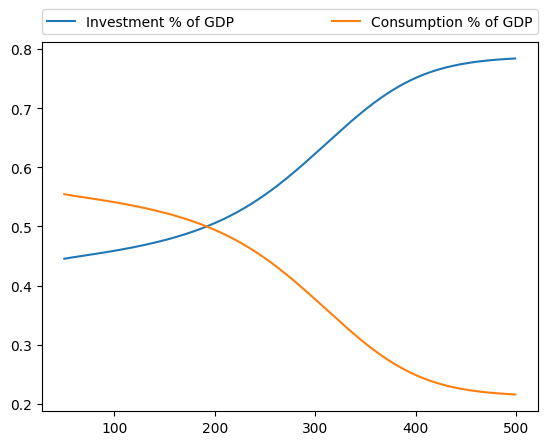

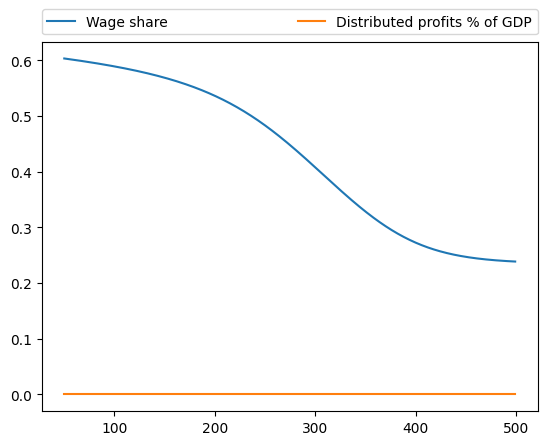

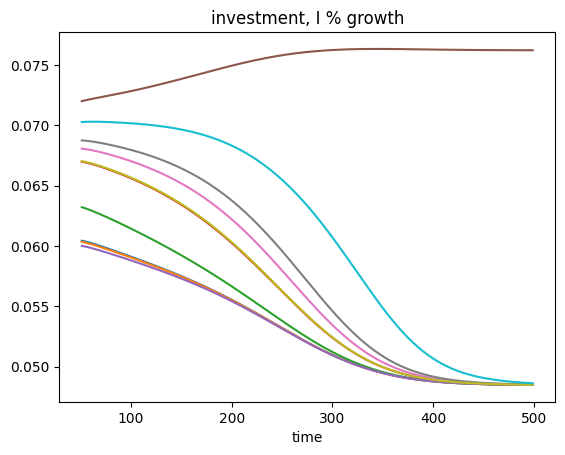

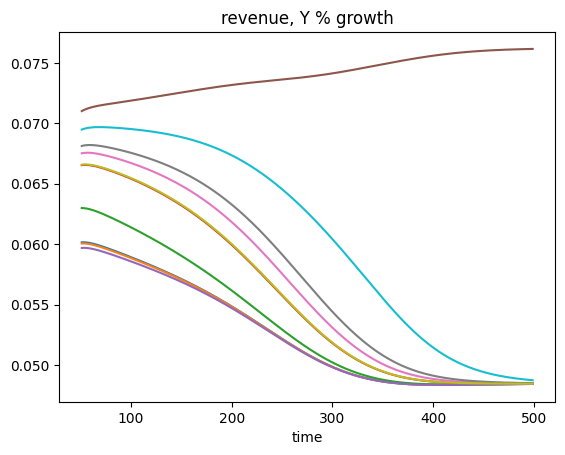

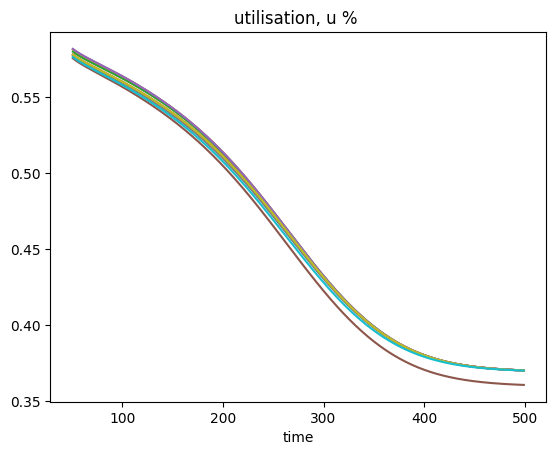

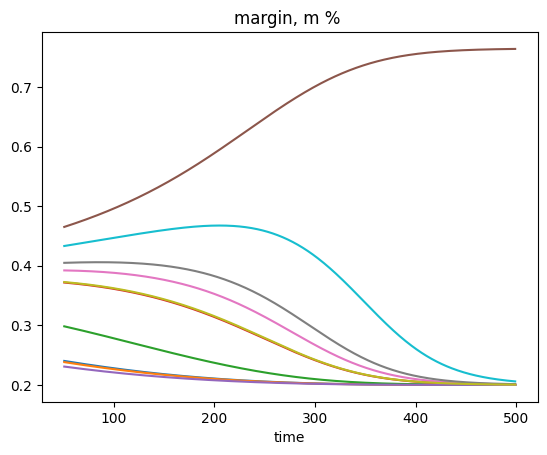

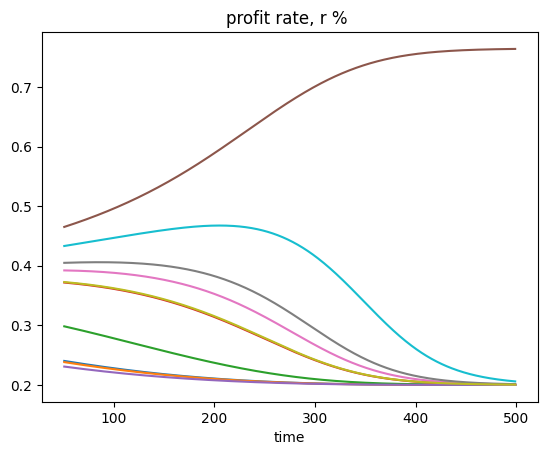

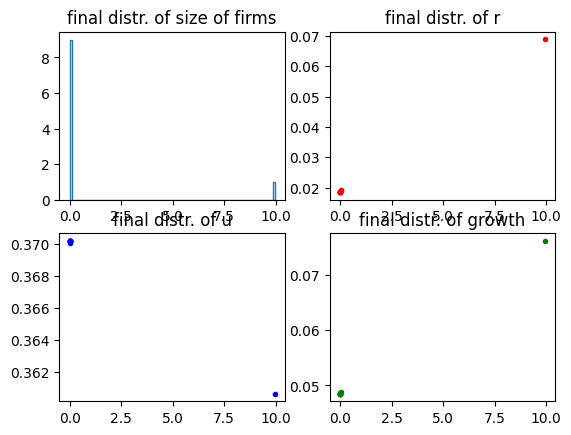

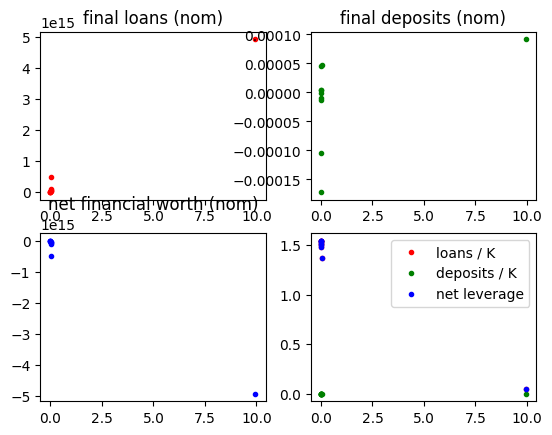

In [5]:
sim1.plot(skip_periods = 50)

We can examine the raw results

In [31]:
sim1.results

I             K  C_intended  E_intended  \
agent     agent_idx time                                                       
aggregate NaN       0     1.122853e+01  1.112285e+02   28.900000   40.128529   
                    1     1.239602e+01  1.236245e+02   29.230577   41.626594   
                    2     1.318384e+01  1.368084e+02   29.772320   42.956162   
                    3     1.396915e+01  1.507775e+02   30.277622   44.246773   
                    4     1.477781e+01  1.655553e+02   30.797410   45.575218   
...                                ...           ...         ...         ...   
firm      9         495   1.356980e+13  2.913774e+14         NaN         NaN   
                    496   1.422980e+13  3.056072e+14         NaN         NaN   
                    497   1.492183e+13  3.205291e+14         NaN         NaN   
                    498   1.564745e+13  3.361765e+14         NaN         NaN   
                    499   1.640829e+13  3.525848e+14         NaN         NaN   

                                     Y            WB  F_d          C  \
agent     agent_idx time                                               
aggregate NaN       0     4.012853e+01  2.465072e+01  0.0  28.900000   
                    1     4.162659e+01  2.556286e+01  0.0  29.230577   
                    2     4.295616e+01  2.637151e+01  0.0  29.772320   
                    3     4.424677e+01  2.715562e+01  0.0  30.277622   
                    4     4.557522e+01  2.796237e+01  0.0  30.797410   
...                                ...           ...  ...        ...   
firm      9         495   2.696369e+13  2.139376e+13  0.0        NaN   
                    496   2.827860e+13  2.244172e+13  0.0        NaN   
                    497   2.965742e+13  2.354071e+13  0.0        NaN   
                    498   3.110325e+13  2.469323e+13  0.0        NaN   
                    499   3.261933e+13  2.590186e+13  0.0        NaN   

                                Y_h             L  ...         m  \
agent     agent_idx time                           ...             
aggregate NaN       0     27.650722  8.028451e+01  ...       NaN   
                    1     28.525382  8.069105e+01  ...       NaN   
                    2     29.312877  8.116413e+01  ...       NaN   
                    3     30.083205  8.170640e+01  ...       NaN   
                    4     30.884119  8.232072e+01  ...       NaN   
...                             ...           ...  ...       ...   
firm      9         495         NaN  3.948199e+14  ...  0.206572   
                    496         NaN  4.150574e+14  ...  0.206407   
                    497         NaN  4.363142e+14  ...  0.206246   
                    498         NaN  4.586411e+14  ...  0.206089   
                    499         NaN  4.820911e+14  ...  0.205935   

                                    it           F_t           F_n  \
agent     agent_idx time                                             
aggregate NaN       0              NaN           NaN           NaN   
                    1              NaN           NaN           NaN   
                    2              NaN           NaN           NaN   
                    3              NaN           NaN           NaN   
                    4              NaN           NaN           NaN   
...                                ...           ...           ...   
firm      9         495   1.126660e+13  5.569929e+12 -5.696673e+12   
                    496   1.184460e+13  5.836888e+12 -6.007709e+12   
                    497   1.245172e+13  6.116711e+12 -6.335010e+12   
                    498   1.308943e+13  6.410023e+12 -6.679405e+12   
                    499   1.375923e+13  6.717473e+12 -7.041760e+12   

                                   F_r         D_f_e         r         u  \
agent     agent_idx time                                                   
aggregate NaN       0              NaN           NaN       NaN       NaN   
                    1              

Or same them to a file to open in excel or other software

In [33]:
sim1.results.to_csv("/tmp/simulation_results.csv")

## Simulation 2: 10 firms, baseline model, stochastic #

Create a new simulation and copy the flags, parameters and starting values from sim1

In [17]:
sim2 = Steindl(num_firms = 10, num_periods = 600)
sim2.copy_init(sim1)

Adjust &zeta; so this simuation includes a stochastic element

In [18]:
sim2.params.zeta = 0.98

INFO:root:initialising model with 600 periods 10 firms
INFO:root:starting simulation for 600 periods with 10 firms
INFO:root:simulation complete
INFO:root:results compiled


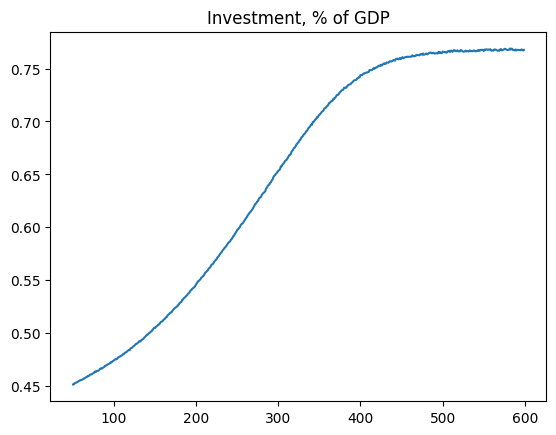

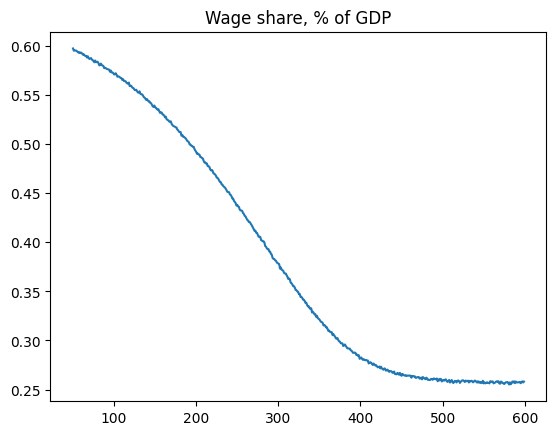

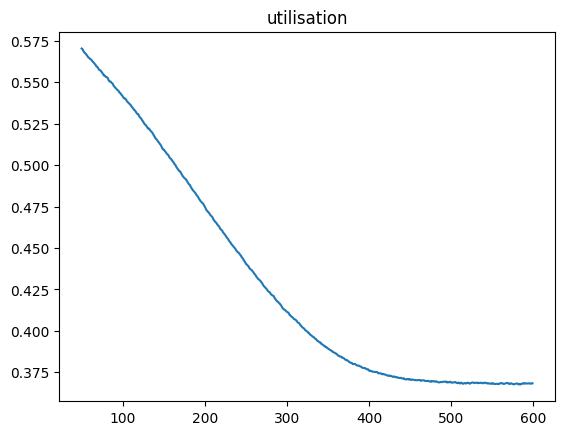

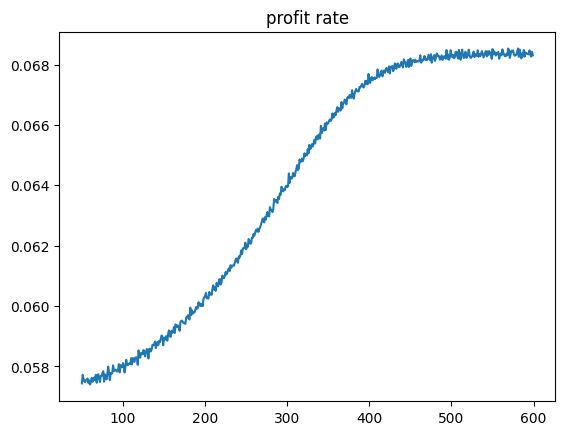

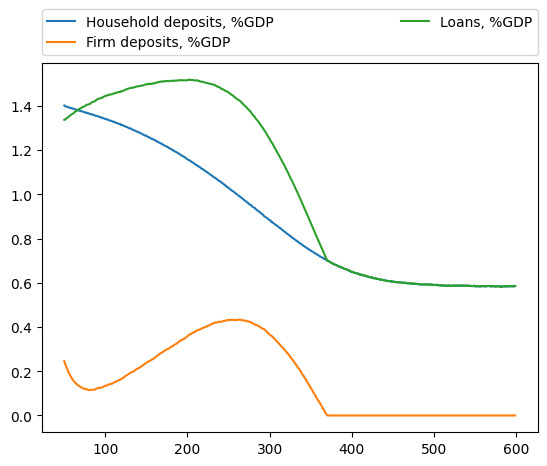

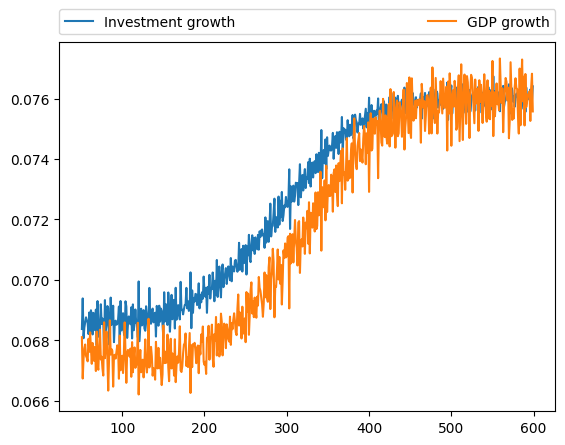

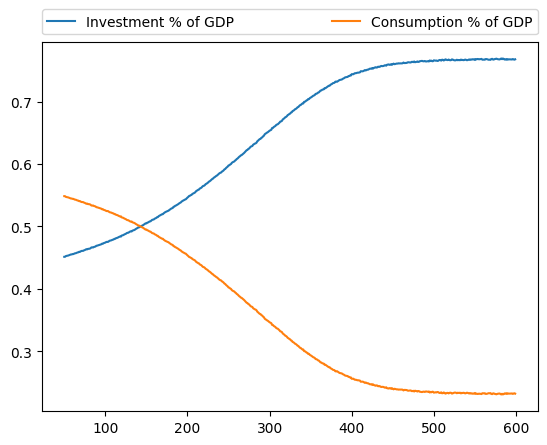

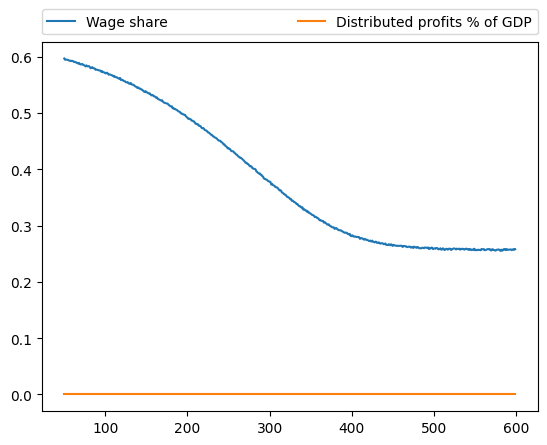

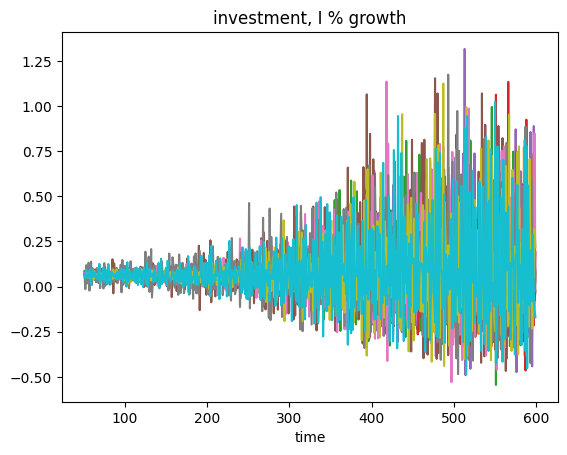

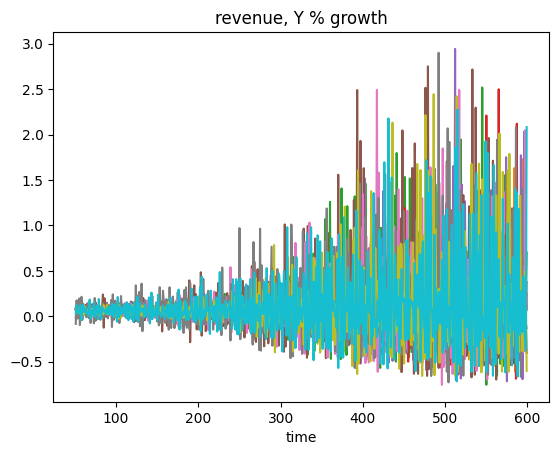

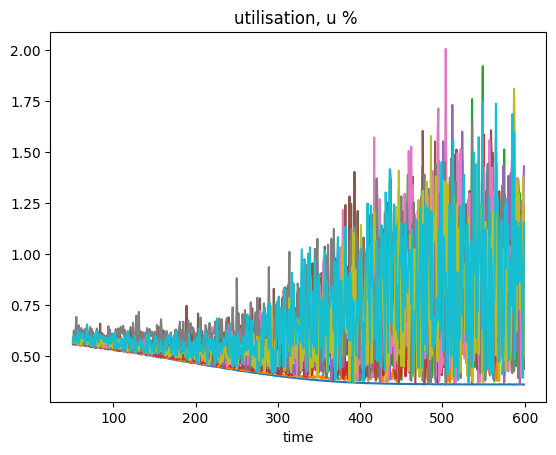

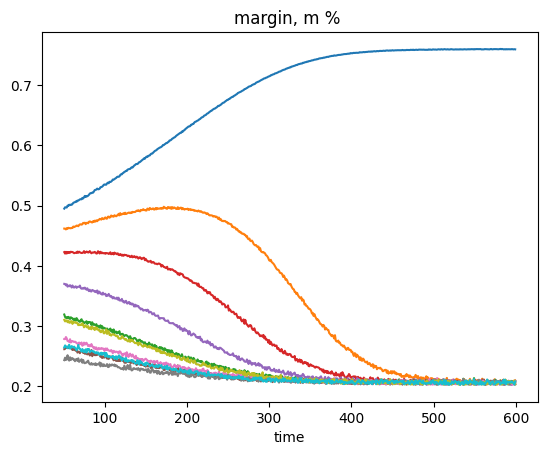

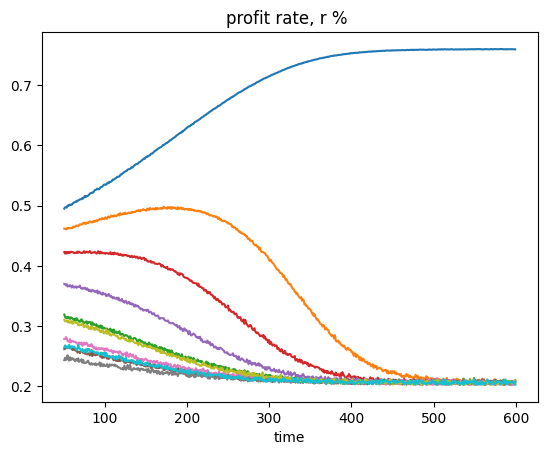

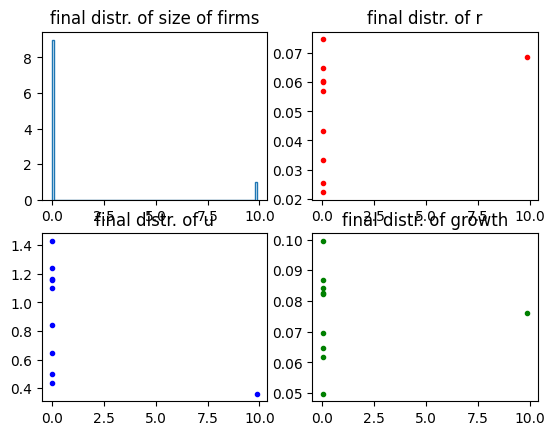

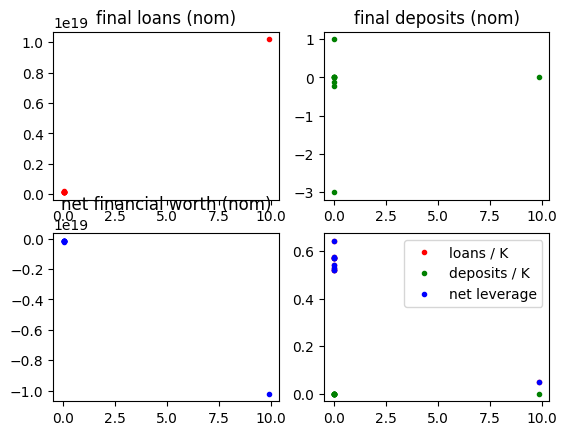

In [19]:
sim2.initialise()
sim2.run()
sim2.plot(skip_periods = 50)

## Simulation 3: 100 firms, baseline model, stochastic ##

A longer simulation with a larger number of firms. In this case the stochastic factor prevents a single 'winner' emerging within the simulation time

INFO:root:initialising model with 1000 periods 100 firms
INFO:root:starting simulation for 1000 periods with 100 firms
INFO:root:simulation complete
INFO:root:results compiled


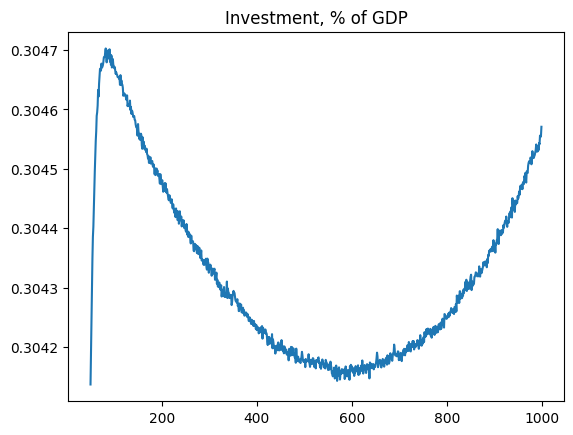

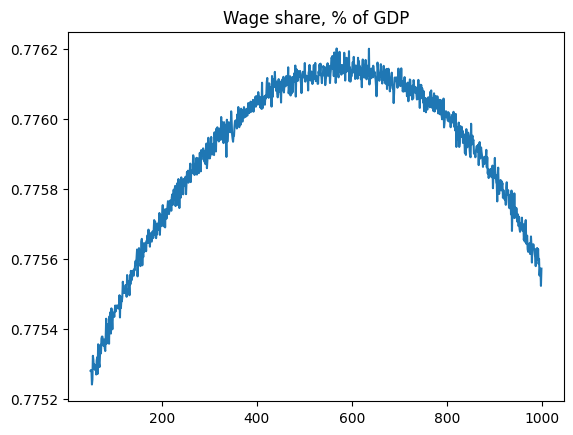

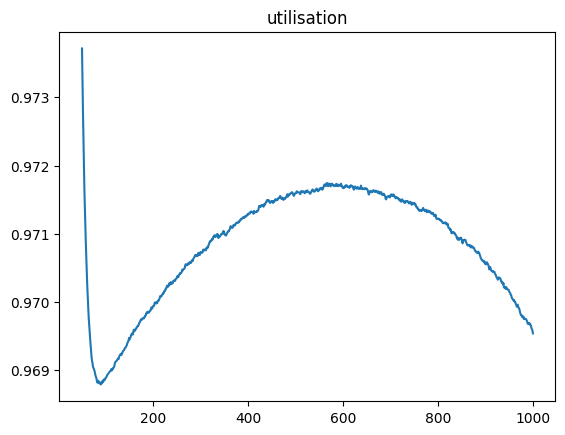

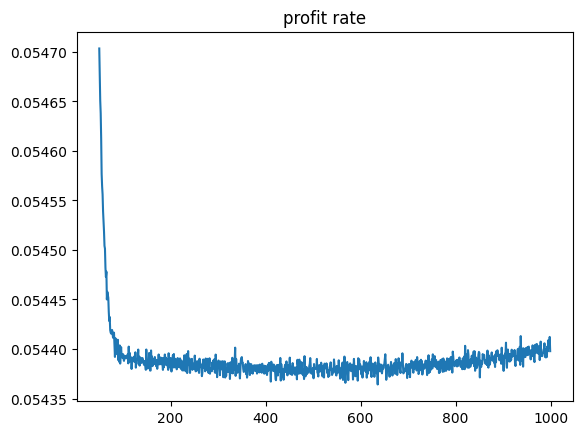

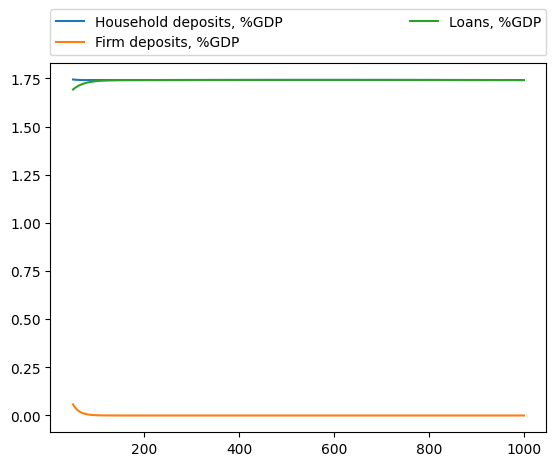

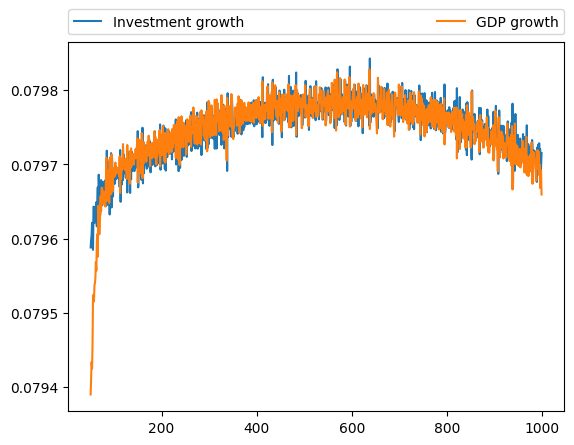

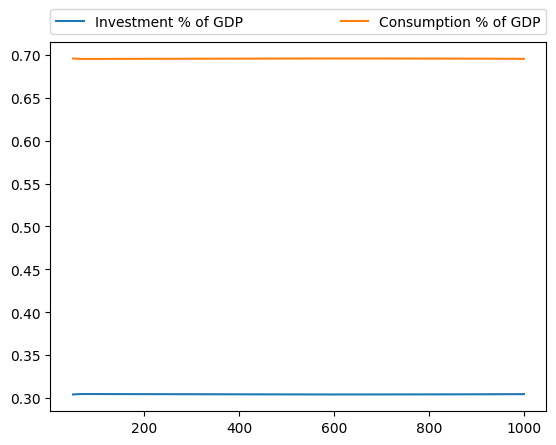

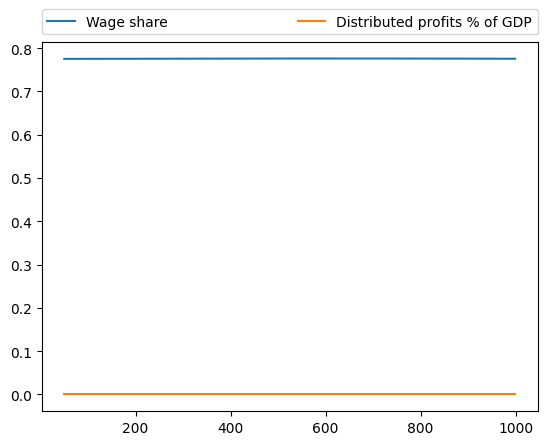

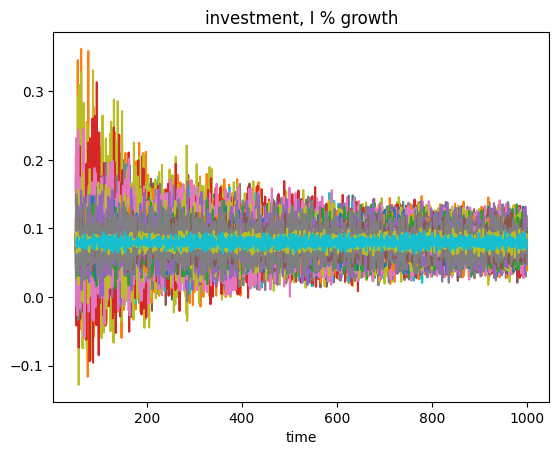

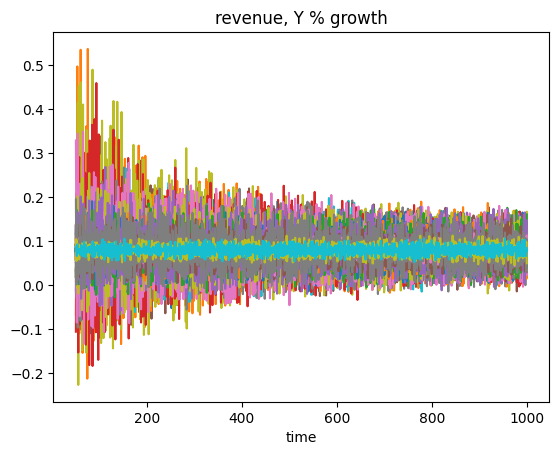

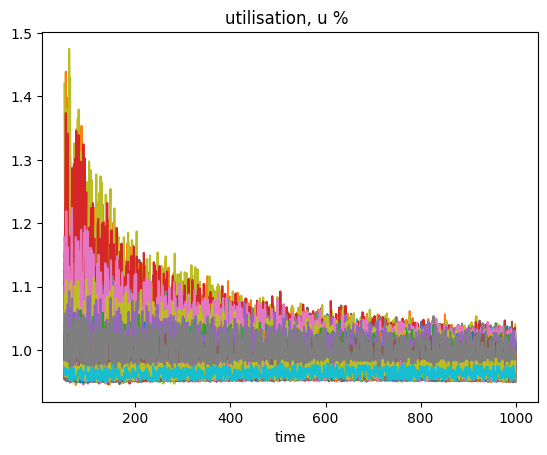

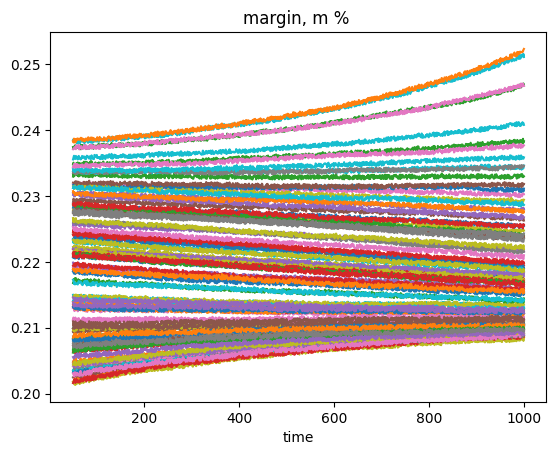

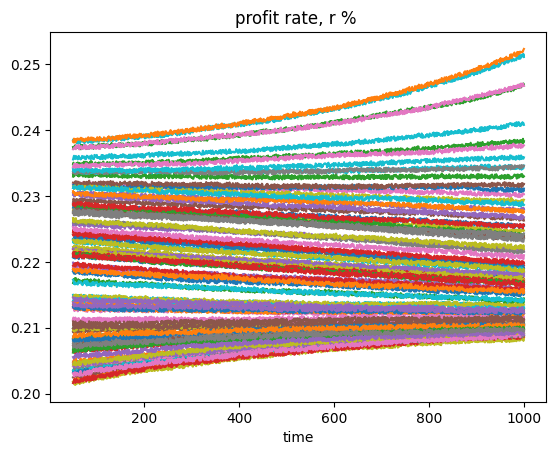

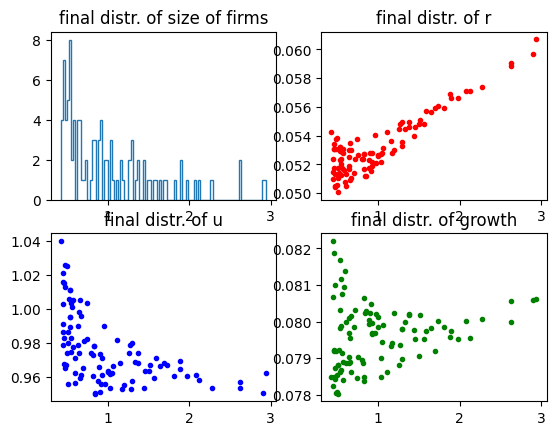

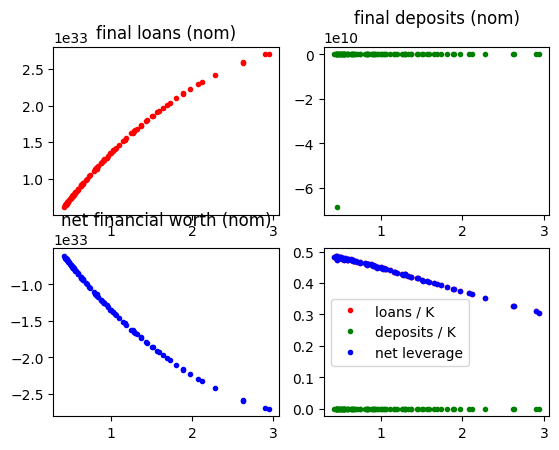

In [22]:
sim3 = Steindl(num_firms = 100, num_periods = 1000)
sim3.copy_init(sim2)
sim3.initialise()
sim3.run()
sim3.plot(skip_periods = 50)

If we run this for longer, a winner does eventually emerge

INFO:root:initialising model with 3000 periods 100 firms
INFO:root:starting simulation for 3000 periods with 100 firms
INFO:root:simulation complete
INFO:root:results compiled


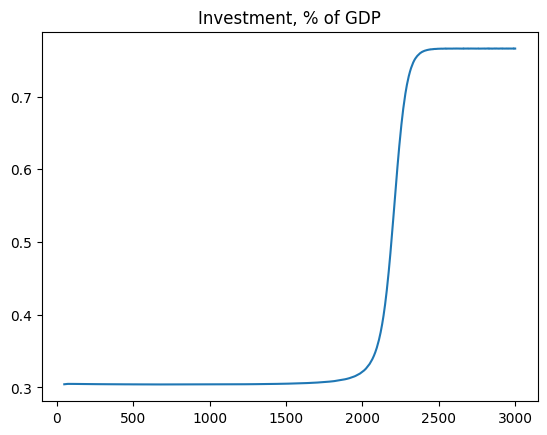

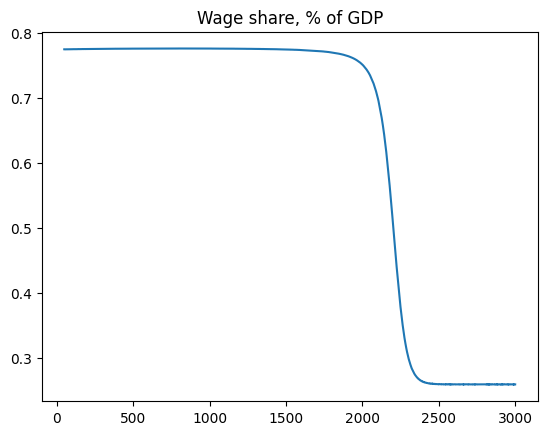

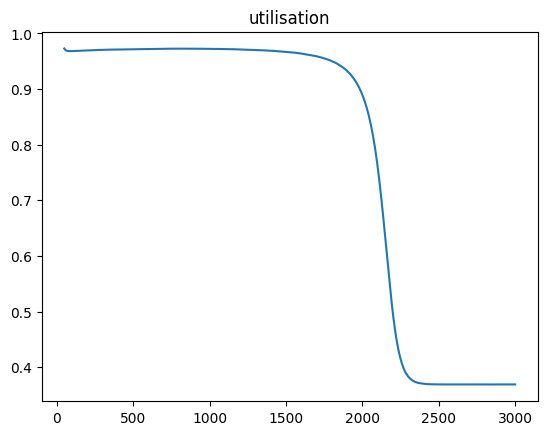

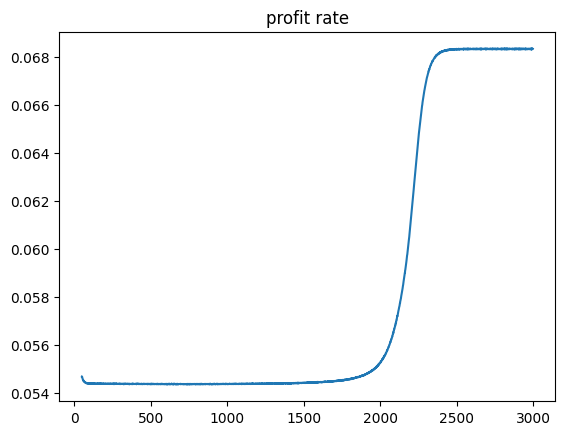

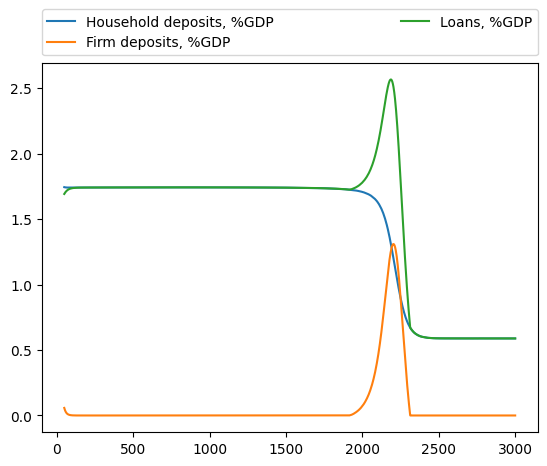

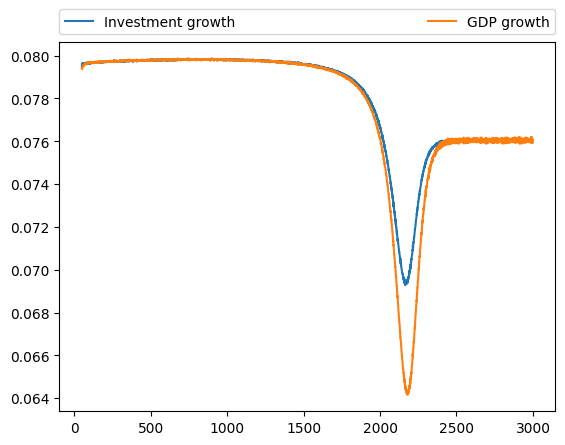

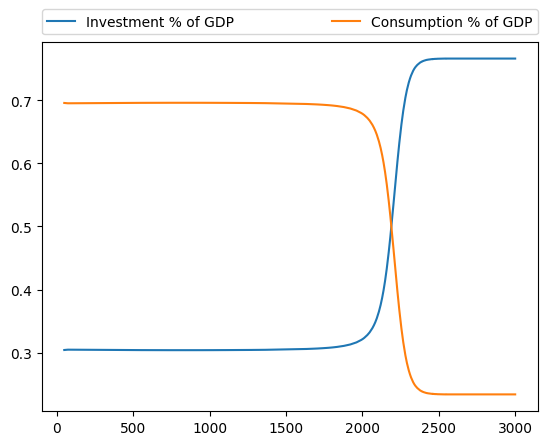

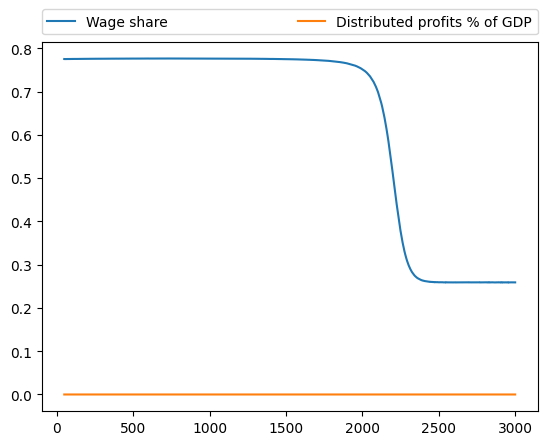

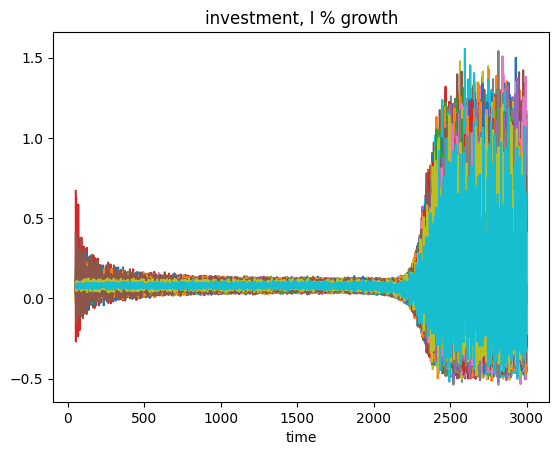

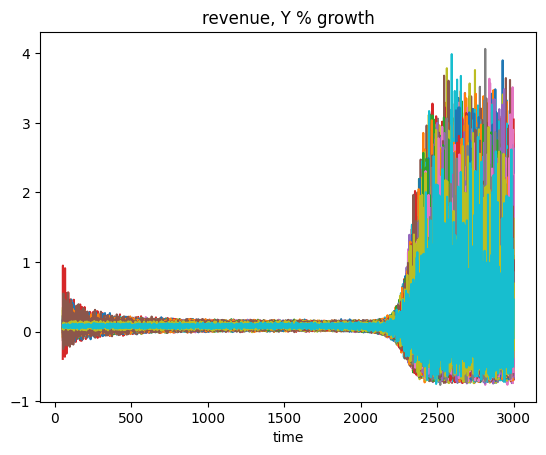

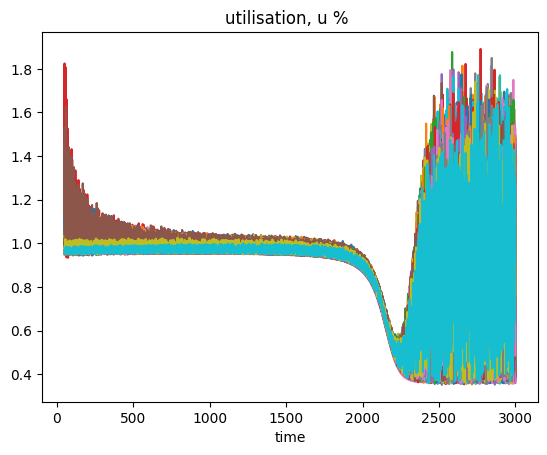

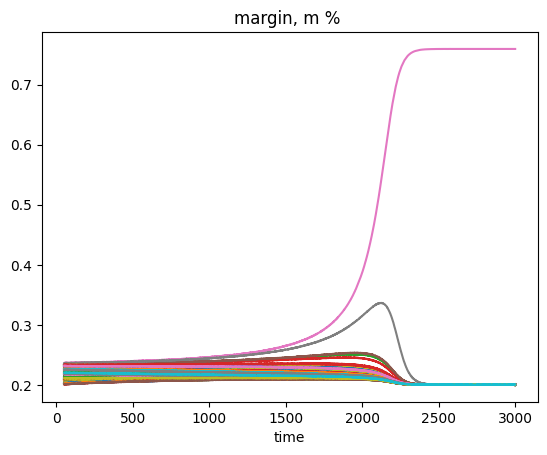

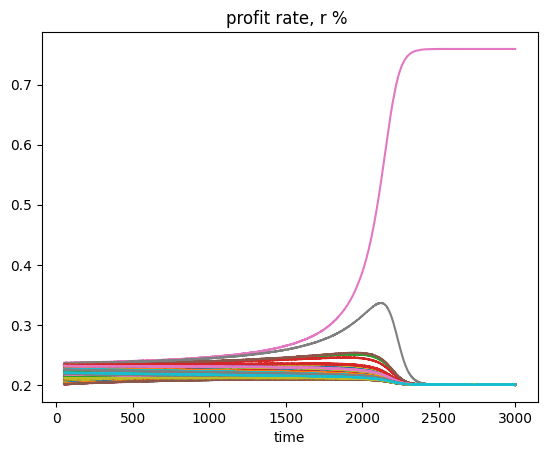

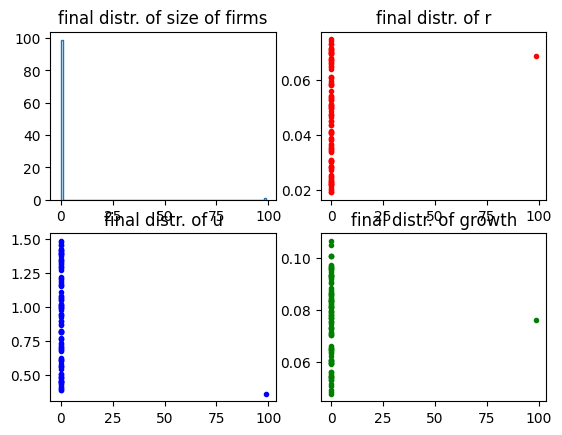

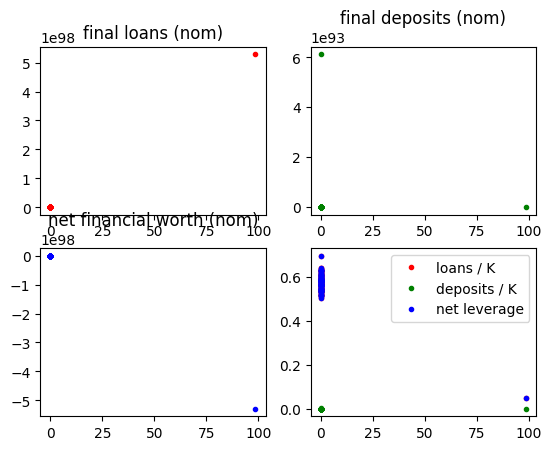

In [23]:
sim3.num_periods = 3000
sim3.initialise()
sim3.run()
sim3.plot(skip_periods = 50)

## Simulation 4: 1000 firms, baseline model, stochastic ##

For simulations with large numbers of firms we can turn off the individual firm time series data. Increase &zeta; to compensate for larger number of firms.

INFO:root:initialising model with 1000 periods 1000 firms
INFO:root:starting simulation for 1000 periods with 1000 firms
INFO:root:simulation complete
INFO:root:results compiled


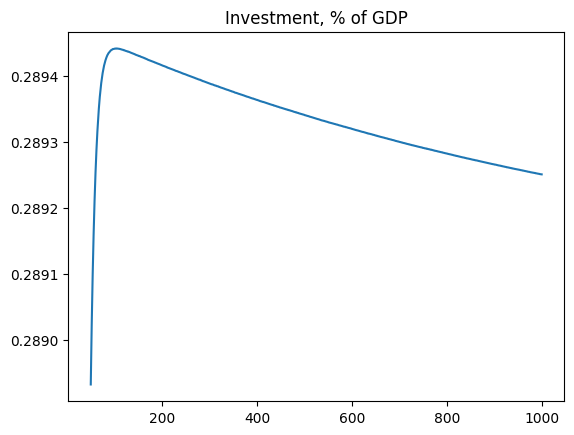

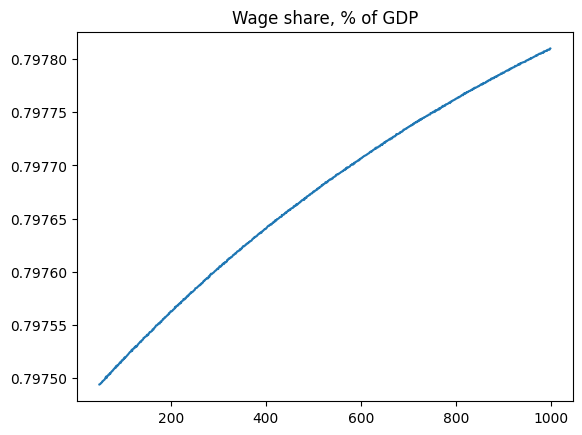

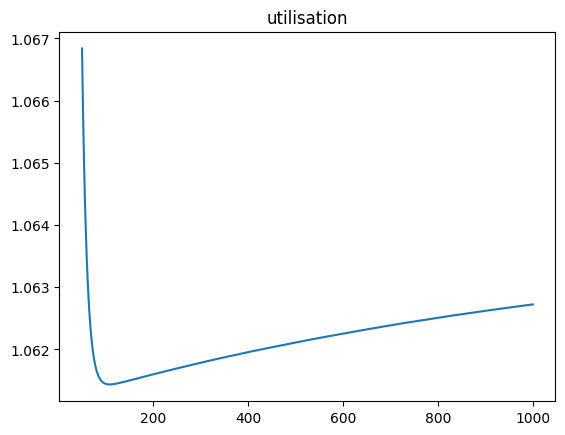

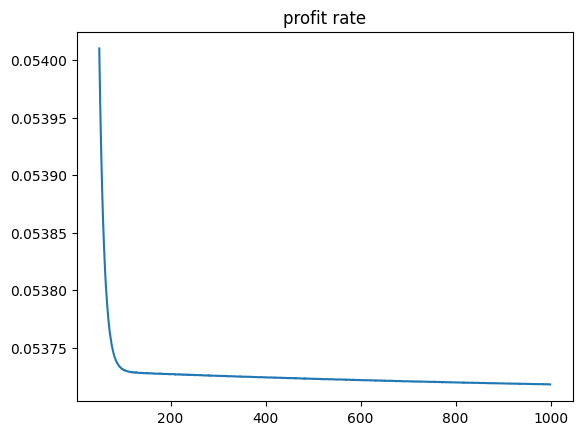

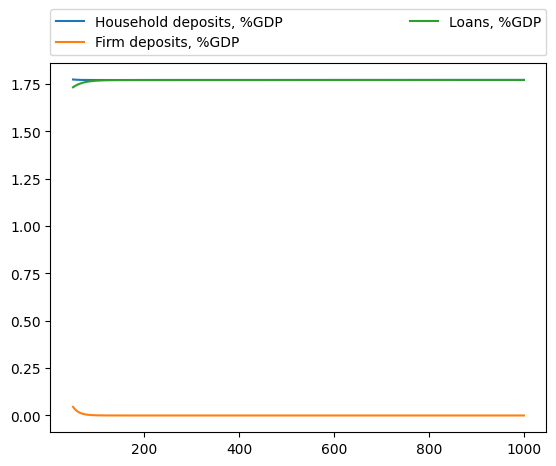

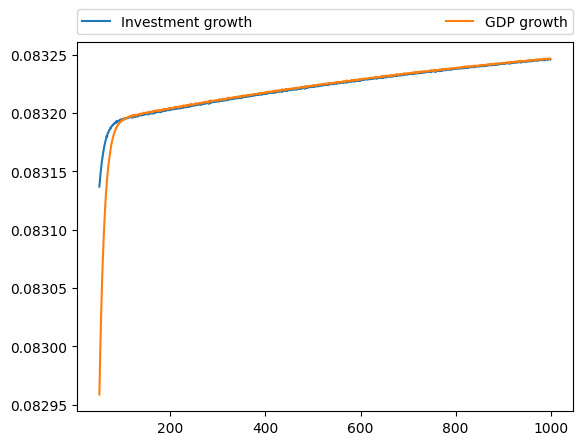

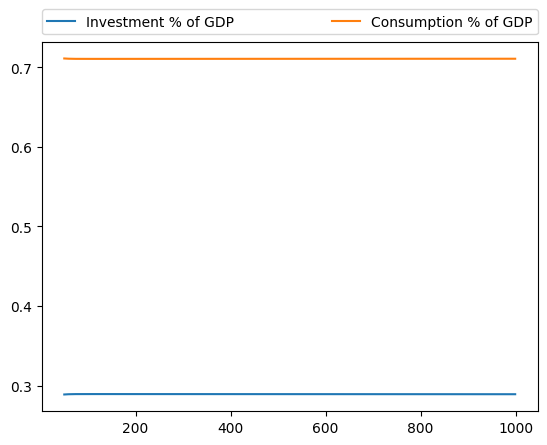

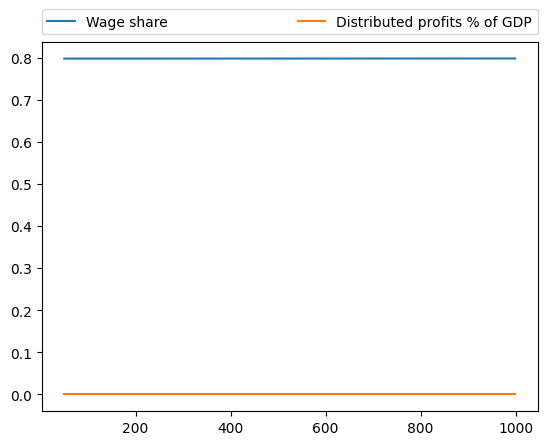

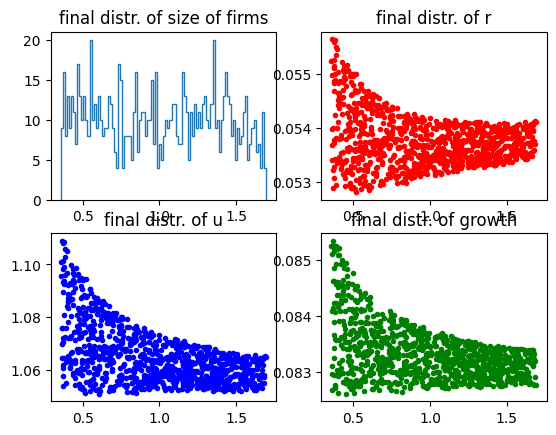

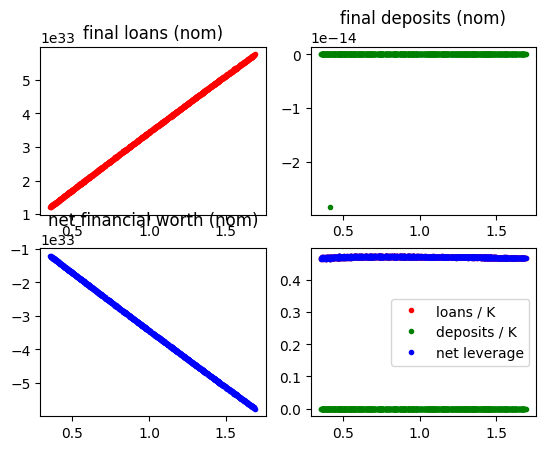

In [28]:
sim4 = Steindl(num_firms = 1000, num_periods = 1000)
sim4.copy_init(sim2)
sim4.flags.firm_results = False
sim4.params.zeta = 0.99
sim4.initialise()
sim4.run()
sim4.plot(skip_periods = 50)

## Simulation 5: 10 firms, full model, deterministic (unstable) ##

If we remove the 'baseline' flag, the more complex model with expectations and liquidity is used. This appears to introduce instabilities, so further checking is required.

INFO:root:initialising model with 600 periods 10 firms
INFO:root:starting simulation for 600 periods with 10 firms
INFO:root:simulation complete
INFO:root:results compiled


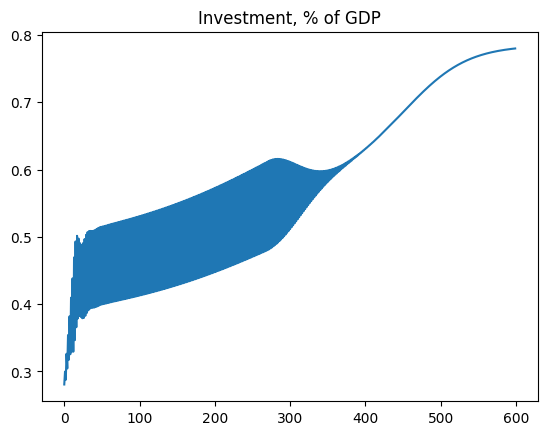

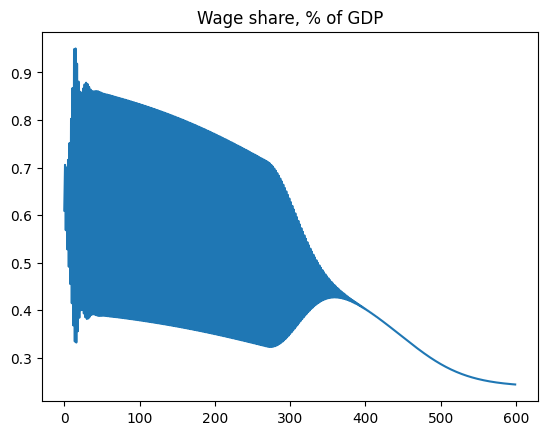

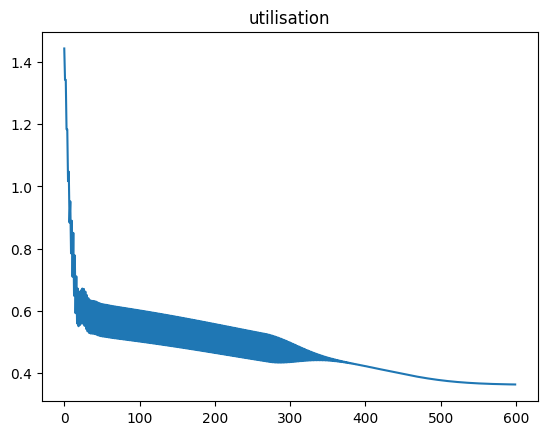

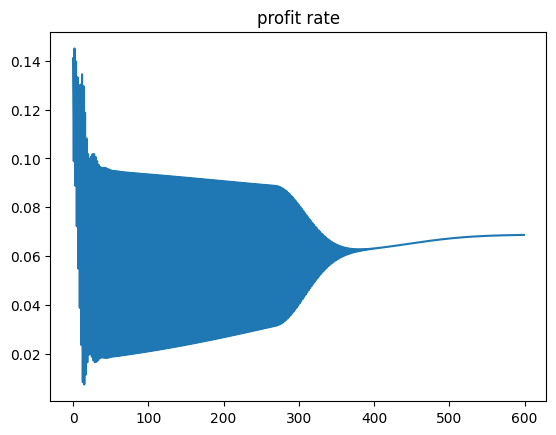

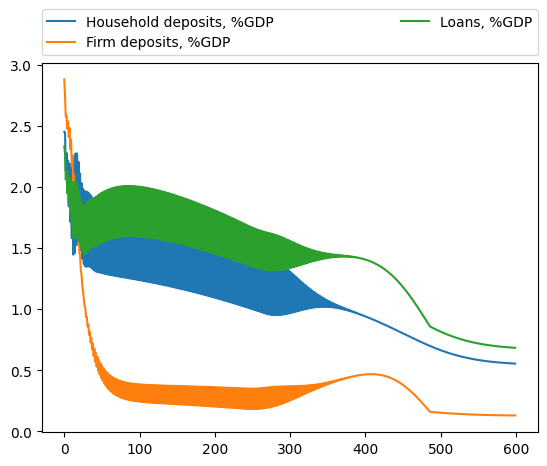

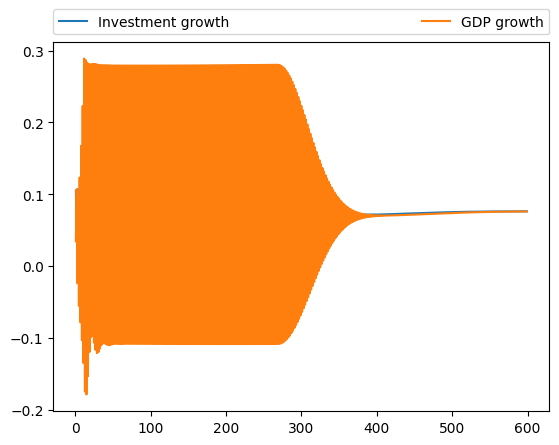

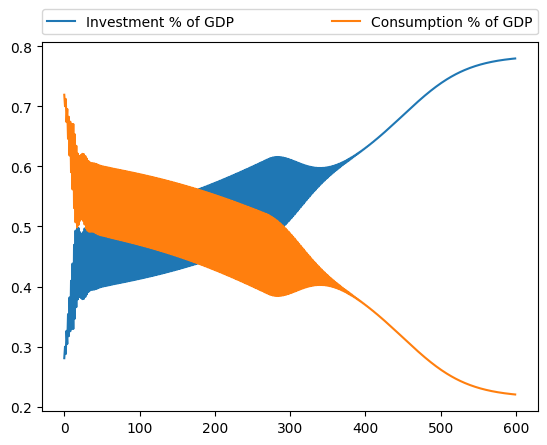

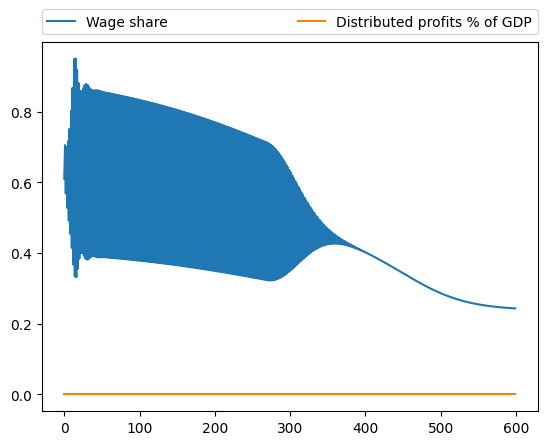

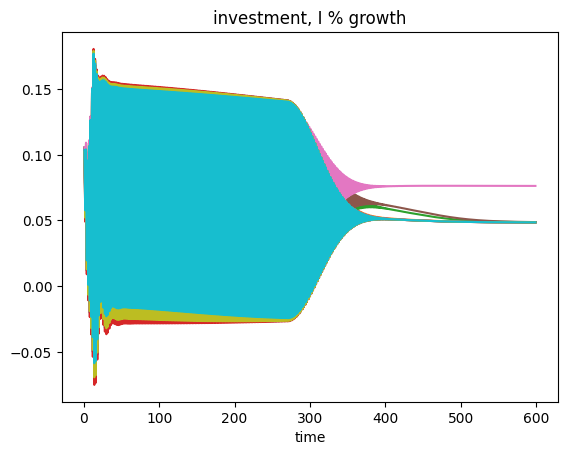

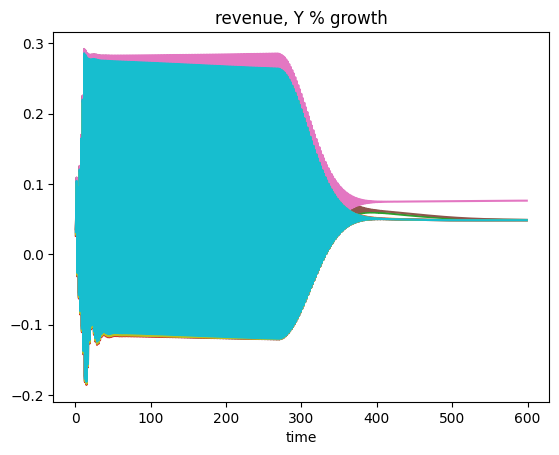

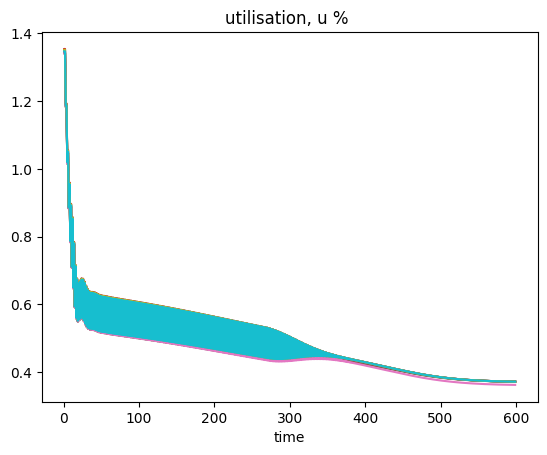

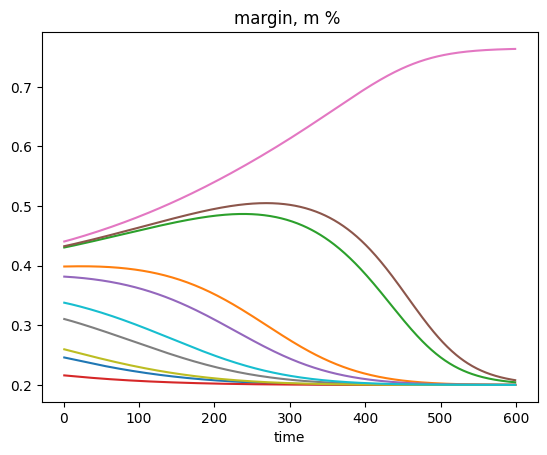

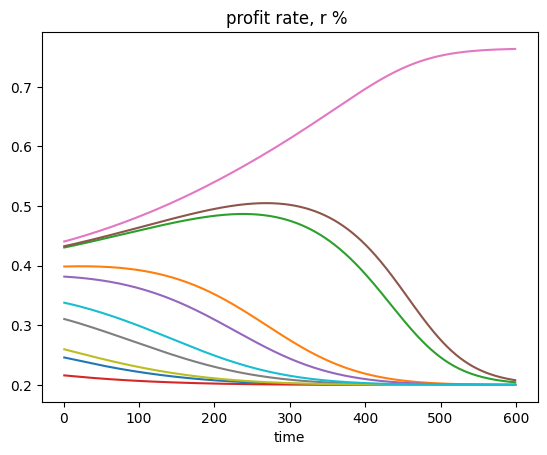

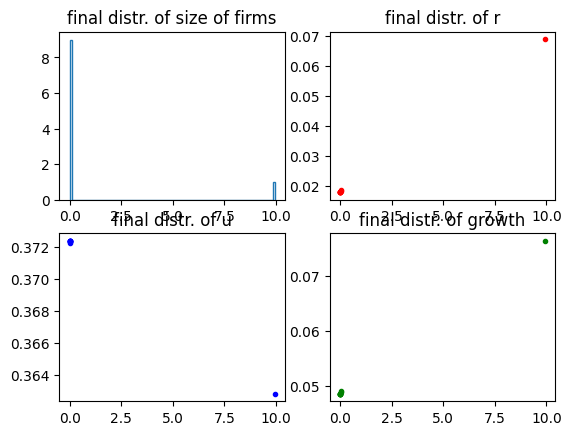

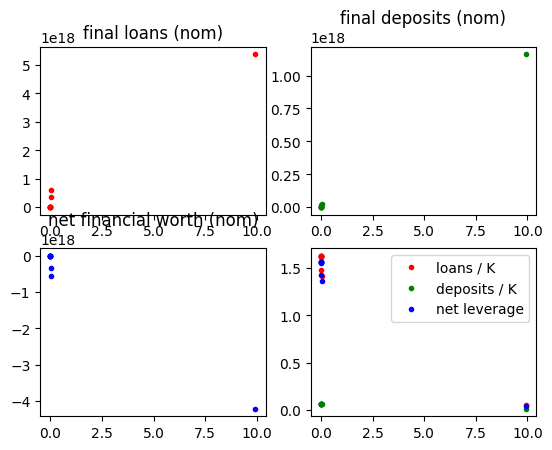

In [35]:
sim5 = Steindl(num_firms = 10, num_periods = 600)
sim5.copy_init(sim1)
sim5.flags.baseline_model = False
sim5.initialise()
sim5.run()
sim5.plot(skip_periods = 0)